<a href="https://colab.research.google.com/github/sommavillamoresco/PowerBI-DataScience/blob/master/C%C3%B3pia_de_C%C3%B3pia_de_Caso_Titanic_An%C3%A1lise_conjunta_entre_colegas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECD - Introdução à Visualização de Dados - Semana 4
## Exercícios 
### Estatística Descritiva, Matriz de Correlação e Exploração de Dados usando Gráficos
##### Prof. Dr. Alessandro de Lima Bicho

## Olá, pessoal!
 
Em 15 de abril de 1912, o maior navio de passageiros já construído colidiu com um iceberg durante sua viagem inaugural. Quando o Titanic afundou, ele matou 1502 dos 2224 passageiros e tripulantes. Esta tragédia chocou a comunidade internacional, e levou a melhores regulamentos de segurança para os navios. Uma das razões pelas quais o naufrágio resultou em tal perda de vidas foi que não havia botes salva-vidas suficientes para os passageiros e tripulantes. Embora houvesse algum elemento de sorte envolvido em sobreviver ao naufrágio, alguns grupos de pessoas tiveram maior probabilidade de sobreviver do que outros.
 
O dataset titanic.csv contém dados de 887 passageiros reais do Titanic. Cada linha representa uma pessoa. As colunas descrevem diferentes atributos sobre a pessoa, incluindo:
- Survived (sobreviveu): se sobreviveu ao naufrágio estará com 1, e 0 (zero) se não sobreviveu;
- Pclass: tipo de classe de passagem (do 1 ao 3), sendo 1 a melhor classe e 3 a pior classe;
- Name: nome do passageiro(a);
- Sex: gênero do passageiro, sendo masculino e feminino;
- Age: idade do passageiro na data da ocorrência do naufrágio;
- Siblings_Spouses_Aboard: número de irmãos/cônjuges a bordo;
- Parents_Children_Aboard: número de pais/filhos a bordo;
- Fare: valor da passagem.  
 
Nesta tarefa, temos duas questões que procurarão fundamentar estatisticamente suas conclusões sobre os sobreviventes deste naufrágio.
 
Bons estudos! 
 
Abraço, Alessandro.

Aqui nós importamos o dataset, que está disponível no meu Google Drive. Caso queiram, podem fazer o download do dataset através do link informado na função `read_csv()` (para análise no Microsoft Excel, por exemplo). 

In [ ]:
#importar a biblioteca pandas
import pandas as pd #importar biblioteca PANDAS
pd.options.display.max_columns = None #não limita numero de colunas do data frame
pd.options.display.max_rows = None #não limita numero de linhas do data frame
pd.options.display.float_format = '{:.2f}'.format #Visualizar valores float do DataFrame com duas casas decimais
 
df = pd.read_csv("https://drive.google.com/uc?export=view&id=1Ad2NNAqsCDGwl125D7z-nSbPLVpCFlYu", error_bad_lines=False, encoding = "ISO-8859-1", sep = ",")
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings_Spouses_Aboard,Parents_Children_Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.00,1,0,7.25
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.00,1,0,71.28
2,1,3,Miss. Laina Heikkinen,female,26.00,0,0,7.92
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.00,1,0,53.10
4,0,3,Mr. William Henry Allen,male,35.00,0,0,8.05


1) Ao rever os dados de 887 passageiros do naufrágio do Titanic, você, cientista de dados, percebe que pode haver uma **correlação** que explique os sobreviventes deste naufrágio! Demonstre, através dos ensinamentos das Semanas 3 e 4, como estatisticamente podemos fundamentar nossa resposta. Explore os possíveis métodos.

In [ ]:
# Responda aqui a questão 1
df.describe() # analisa séries numéricas ou de objetos, assim como colunas em DataFrames de tipos de dados mistos 


,Survived,Pclass,Age,Siblings_Spouses_Aboard,Parents_Children_Aboard,Fare
count,887.00,887.00,887.00,887.00,887.00,887.00
mean,0.39,2.31,29.47,0.53,0.38,32.31
std,0.49,0.84,14.12,1.10,0.81,49.78
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.25,0.00,0.00,7.92
50%,0.00,3.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,38.00,1.00,0.00,31.14
max,1.00,3.00,80.00,8.00,6.00,512.33


In [ ]:
df.dtypes


Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings_Spouses_Aboard      int64
Parents_Children_Aboard      int64
Fare                       float64
dtype: object

In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings_Spouses_Aboard',
       'Parents_Children_Aboard', 'Fare'],
      dtype='object')

In [ ]:
df.sum()

Survived                                                                 342
Pclass                                                                  2045
Name                       Mr. Owen Harris BraundMrs. John Bradley (Flore...
Sex                        malefemalefemalefemalemalemalemalemalefemalefe...
Age                                                                 26141.17
Siblings_Spouses_Aboard                                                  466
Parents_Children_Aboard                                                  340
Fare                                                                28654.91
dtype: object

In [ ]:
df.groupby('Sex')['Survived'].mean()

Sex
female   0.74
male     0.19
Name: Survived, dtype: float64

In [ ]:
df.groupby('Sex').mean()

,Survived,Pclass,Age,Siblings_Spouses_Aboard,Parents_Children_Aboard,Fare
Sex,,,,,,
female,0.74,2.16,27.72,0.69,0.65,44.48
male,0.19,2.39,30.43,0.43,0.24,25.63


In [ ]:
df['Sex']=df['Sex'].map({"male":0, "female":1})
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings_Spouses_Aboard,Parents_Children_Aboard,Fare
0,0,3,Mr. Owen Harris Braund,0,22.00,1,0,7.25
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,1,38.00,1,0,71.28
2,1,3,Miss. Laina Heikkinen,1,26.00,0,0,7.92
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,1,35.00,1,0,53.10
4,0,3,Mr. William Henry Allen,0,35.00,0,0,8.05


In [ ]:
df[df['Survived'] == 1]['Fare'].mean()

48.39540760233917

In [ ]:
df.groupby('Survived').mean()

,Pclass,Sex,Age,Siblings_Spouses_Aboard,Parents_Children_Aboard,Fare,Sex_N
Survived,,,,,,,
0,2.53,0.15,30.14,0.56,0.33,22.21,1.00
1,1.95,0.68,28.41,0.47,0.46,48.40,1.00


In [ ]:
df.groupby(['Survived','Sex']).count()

Pclass  Name  Age  Siblings_Spouses_Aboard  \
Survived Sex                                               
0        0       464   464  464                      464   
         1        81    81   81                       81   
1        0       109   109  109                      109   
         1       233   233  233                      233   

              Parents_Children_Aboard  Fare  Sex_N  
Survived Sex                                        
0        0                        464   464    464  
         1                         81    81     81  
1        0                        109   109    109  
         1                        233   233    233

In [ ]:
df.groupby(['Survived','Sex','Pclass']).mean()

Age  Siblings_Spouses_Aboard  Parents_Children_Aboard  \
Survived Sex Pclass                                                           
0        0   1      44.29                     0.27                     0.26   
             2      33.00                     0.31                     0.14   
             3      27.14                     0.53                     0.22   
         1   1      25.67                     0.67                     1.33   
             2      36.00                     0.50                     0.17   
             3      23.40                     1.29                     1.10   
1        0   1      36.75                     0.38                     0.31   
             2      17.08                     0.53                     0.65   
             3      22.24                     0.34                     0.30   
         1   1      35.57                     0.55                     0.43   
             2      28.38                     0.49                     0.64   
             3      20.87                     0.50                     0.50   

                      Fare  Sex_N  
Survived Sex Pclass                
0        0   1       62.89   1.00  
             2       19.49   1.00  
             3       12.24   1.00  
         1   1      110.60   1.00  
             2       18.25   1.00  
             3       19.77   1.00  
1        0   1       74.64   1.00  
             2       21.10   1.00  
             3       15.58   1.00  
         1   1      105.98   1.00  
             2       22.29   1.00  
             3       12.46   1.00

In [ ]:
df.corr()

,Survived,Pclass,Sex,Age,Siblings_Spouses_Aboard,Parents_Children_Aboard,Fare,Sex_N
Survived,1.00,-0.34,0.54,-0.06,-0.04,0.08,0.26,nan
Pclass,-0.34,1.00,-0.13,-0.39,0.09,0.02,-0.55,nan
Sex,0.54,-0.13,1.00,-0.09,0.11,0.24,0.18,nan
Age,-0.06,-0.39,-0.09,1.00,-0.30,-0.19,0.11,nan
Siblings_Spouses_Aboard,-0.04,0.09,0.11,-0.30,1.00,0.41,0.16,nan
Parents_Children_Aboard,0.08,0.02,0.24,-0.19,0.41,1.00,0.22,nan
Fare,0.26,-0.55,0.18,0.11,0.16,0.22,1.00,nan
Sex_N,nan,nan,nan,nan,nan,nan,nan,nan


In [ ]:
df.corr().style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.6/dist-packages/pandas/io/formats/style.py:1126: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/usr/local/lib/python3.6/dist-packages/pandas/io/formats/style.py:1127: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,Survived,Pclass,Sex,Age,Siblings_Spouses_Aboard,Parents_Children_Aboard,Fare,Sex_N
Survived,1.000000,-0.336528,0.542152,-0.059665,-0.037082,0.080097,0.256179,nan
Pclass,-0.336528,1.000000,-0.129507,-0.391492,0.085026,0.020252,-0.548919,nan
Sex,0.542152,-0.129507,1.000000,-0.091875,0.113249,0.244337,0.181137,nan
Age,-0.059665,-0.391492,-0.091875,1.000000,-0.297669,-0.193741,0.112329,nan
Siblings_Spouses_Aboard,-0.037082,0.085026,0.113249,-0.297669,1.000000,0.414244,0.158839,nan
Parents_Children_Aboard,0.080097,0.020252,0.244337,-0.193741,0.414244,1.000000,0.215470,nan
Fare,0.256179,-0.548919,0.181137,0.112329,0.158839,0.215470,1.000000,nan
Sex_N,nan,nan,nan,nan,nan,nan,nan,nan


In [ ]:
import matplotlib.pyplot as plt
#gráfico que mostra a correlação em imagem
correlacao = df.corr()
plt.figure(figsize=(7,5))
plt.imshow(correlacao, cmap='Blues',interpolation='none',aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlacao)),correlacao.columns,rotation='vertical')
plt.yticks(range(len(correlacao)),correlacao.columns)
plt.suptitle('Correlação entre os dados',fontsize=15,fontweight='bold')
plt.grid(False)
plt.show

Pclass
1   84.15
2   20.66
3   13.71
Name: Fare, dtype: float64

2) Apresente um gráfico de livre escolha que auxilie nas conclusões que expliquem os sobreviventes do naufrágio.

<function matplotlib.pyplot.show>

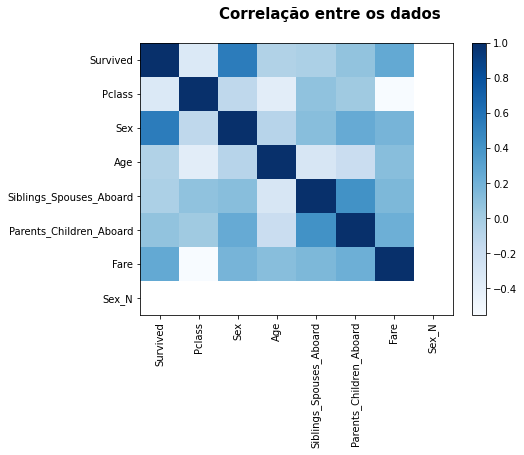

In [ ]:
import matplotlib.pyplot as plt #importa biblioteca MATPLOTLIB
#gráfico que mostra a correlação em imagem
correlacao = df.corr() #define uma variavel correlaçao
plt.figure(figsize=(7,5)) # define o tamanho da figura
plt.imshow(correlacao, cmap='Blues',interpolation='none',aspect='auto') #
plt.colorbar()
plt.xticks(range(len(correlacao)),correlacao.columns,rotation='vertical')
plt.yticks(range(len(correlacao)),correlacao.columns)
plt.suptitle('Correlação entre os dados',fontsize=15,fontweight='bold')
plt.grid(False)
plt.show

In [ ]:
# Responda aqui a questão 2

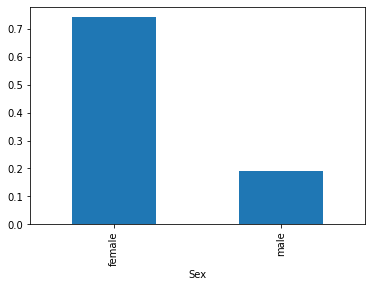

In [ ]:
df.groupby('Sex')['Survived'].mean().plot(kind='bar')

(-1.1069252188010887,
 1.1003297812542465,
 -1.1053624457381575,
 1.1075994730177563)

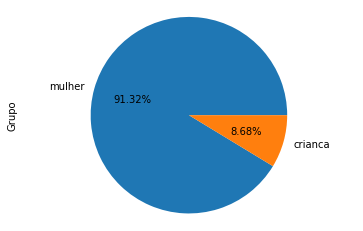

In [ ]:
def get_grupo(row):
    if row.Age < 12:
        return 'crianca'
    else:
        return 'homem' if row.Sex == 'male' else 'mulher'

df['Grupo'] = df.apply(get_grupo, axis=1)
df.head()

df.Grupo.value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')